# Warmup Question 3
From *HealthCare Fraud Detection Capstone Project Proposal.ipynb*

**Summary:**

Time Series Analysis

In [7]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

In [80]:
# time series libraries
from scipy.stats import pearsonr
# import statsmodels.api as sm
# from statsmodels.graphics.tsaplots import plot_acf
import seaborn

import warnings
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message=".*FigureCanvasAgg is non-interactive.*"
)
import os
os.environ["NIXTLA_ID_AS_COL"] = "true"
import numpy as np
np.set_printoptions(suppress=True)
np.random.seed(1)
import random
random.seed(1)
import pandas as pd
pd.set_option("max_colwidth", 100)
pd.set_option("display.precision", 3)
from utilsforecast.plotting import plot_series as plot_series_utils
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "figure.constrained_layout.use": True,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "legend.title_fontsize": 10,
})
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=["#000000", "#000000"])
from fpppy.utils import plot_series

from statsmodels.graphics.tsaplots import plot_acf

In [3]:
# from statsforecast import StatsForecast

# from statsforecast.models import (
#     WindowAverage,
#     Naive,
#     SeasonalNaive,
#     RandomWalkWithDrift,
#     HistoricAverage,
#     AutoARIMA
# )

## Get the data

In [11]:
beneficiary = pd.read_csv('data/archive/Train_Beneficiarydata-1542865627584.csv')
print(beneficiary.shape)
beneficiary.head(2)

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


In [13]:
inpatient = pd.read_csv('data/archive/Train_Inpatientdata-1542865627584.csv')
print(inpatient.shape)
inpatient.head(2) 

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [15]:
outpatient = pd.read_csv('data/archive/Train_Outpatientdata-1542865627584.csv')
print(outpatient.shape)
outpatient.head(2)

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [17]:
labels = pd.read_csv('data/archive/Train-1542865627584.csv')
print(labels.shape)
labels.head(2)

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


## beneficiary data

In [21]:
beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [23]:
# missing data
beneficiary.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

## outpatient data

In [26]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [28]:
# missing data
outpatient.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

## inpatient data

In [31]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [33]:
# missing data
inpatient.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

## provider data

In [36]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [38]:
# missing data
labels.isnull().sum()

Provider          0
PotentialFraud    0
dtype: int64

In [40]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [42]:
# change date objects to datetime objects
inpatient['ClaimStartDt'] = pd.to_datetime(inpatient['ClaimStartDt'])
inpatient['ClaimEndDt'] = pd.to_datetime(inpatient['ClaimEndDt'])
inpatient['AdmissionDt'] = pd.to_datetime(inpatient['AdmissionDt'])
inpatient['DischargeDt'] = pd.to_datetime(inpatient['DischargeDt'])

outpatient['ClaimStartDt'] = pd.to_datetime(outpatient['ClaimStartDt'])
outpatient['ClaimEndDt'] = pd.to_datetime(outpatient['ClaimEndDt'])

### Warmup Question 3, Time Series Analysis:
- Based on the attribute **ClaimStartDt**, analyze the weekly service volume variations.
- What are the weekly patterns (weekly seasonalities) you observe for the demands on **inpatient** or **outpatient**
services?
- Identify the top $5$ most frequent **ClmAdmitDiagnosisCodes** and trace their weekly seasonalities.
Display the patterns you find.
- For the inpatient patients, is there any pattern between the durations of the treatments and
the patient attributes?
- For the monthly inpatient/outpatient claim counts of all the providers, please analyze the
table of provider-month matrices and report any interesting findings.

- **hint**: dataframe's pivot_table method could be used to construct the provider-month matrix.

# Based on the attribute ClaimStartDt, analyze the weekly service volume variations.

In [44]:
inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


### get the number of claims filed each day

In [47]:
outpatient.groupby('ClaimStartDt')['ClaimStartDt'].count()

ClaimStartDt
2008-12-12      78
2008-12-13      67
2008-12-14      45
2008-12-15      75
2008-12-16      75
              ... 
2009-12-27    1130
2009-12-28    1170
2009-12-29    1043
2009-12-30    1134
2009-12-31    1098
Name: ClaimStartDt, Length: 385, dtype: int64

In [49]:
inpatient_daily = inpatient.groupby([
    pd.Grouper(key='ClaimStartDt', freq='D')
]).size().reset_index(name='y')

In [51]:
outpatient_daily = outpatient.groupby([
    pd.Grouper(key='ClaimStartDt', freq='D')
]).size().reset_index(name='y')

In [52]:
outpatient_daily.head()

,ClaimStartDt,y
0,2008-12-12,78
1,2008-12-13,67
2,2008-12-14,45
3,2008-12-15,75
4,2008-12-16,75


In [55]:
# rename columns for Nixtla and add unique_id
inpatient_daily.columns = ['ds', 'y']
outpatient_daily.columns = ['ds', 'y']

In [57]:
inpatient_daily['unique_id'] = 'claim_volume'
outpatient_daily['unique_id'] = 'claim_volume'

In [59]:
outpatient_daily.head(2)

,ds,y,unique_id
0,2008-12-12,78,claim_volume
1,2008-12-13,67,claim_volume


In [61]:
outpatient_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         385 non-null    datetime64[ns]
 1   y          385 non-null    int64         
 2   unique_id  385 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 9.2+ KB


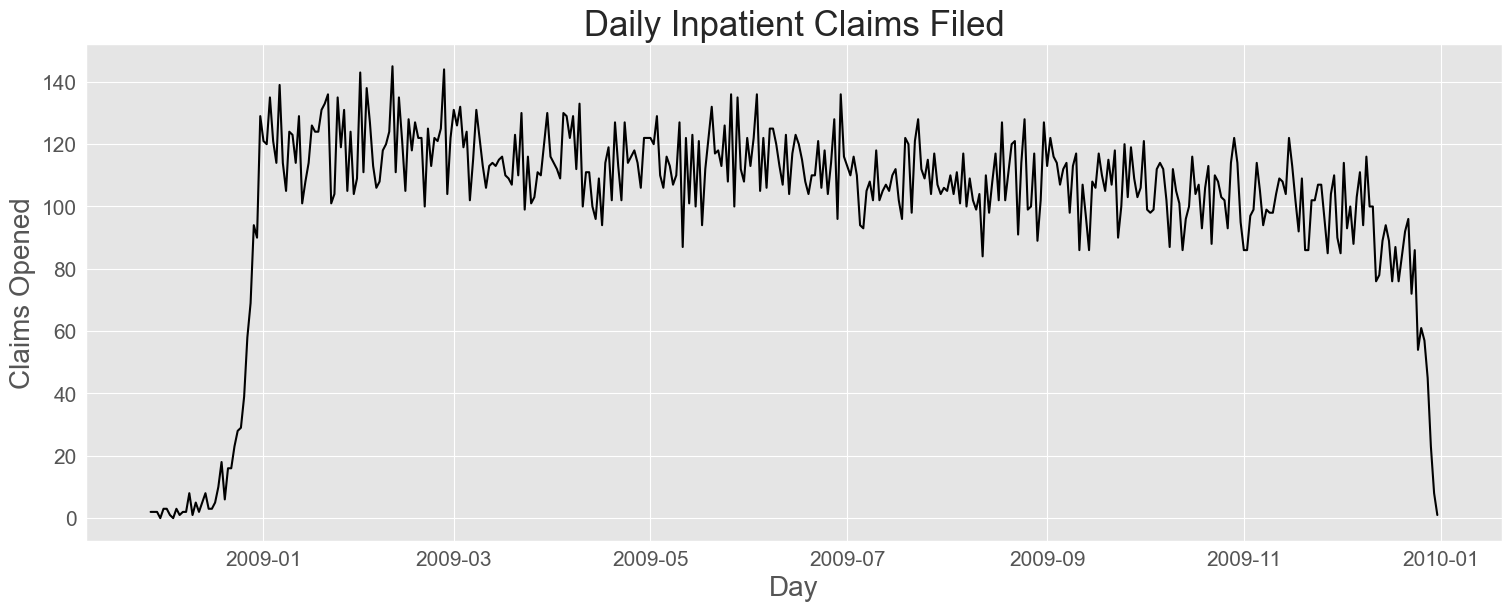

In [63]:
# visualize the time series
plot_series(df=inpatient_daily,
            id_col="unique_id",
            time_col="ds",
            target_col="y",
            ylabel="Claims Opened",
            xlabel="Day",
            title="Daily Inpatient Claims Filed"
           )

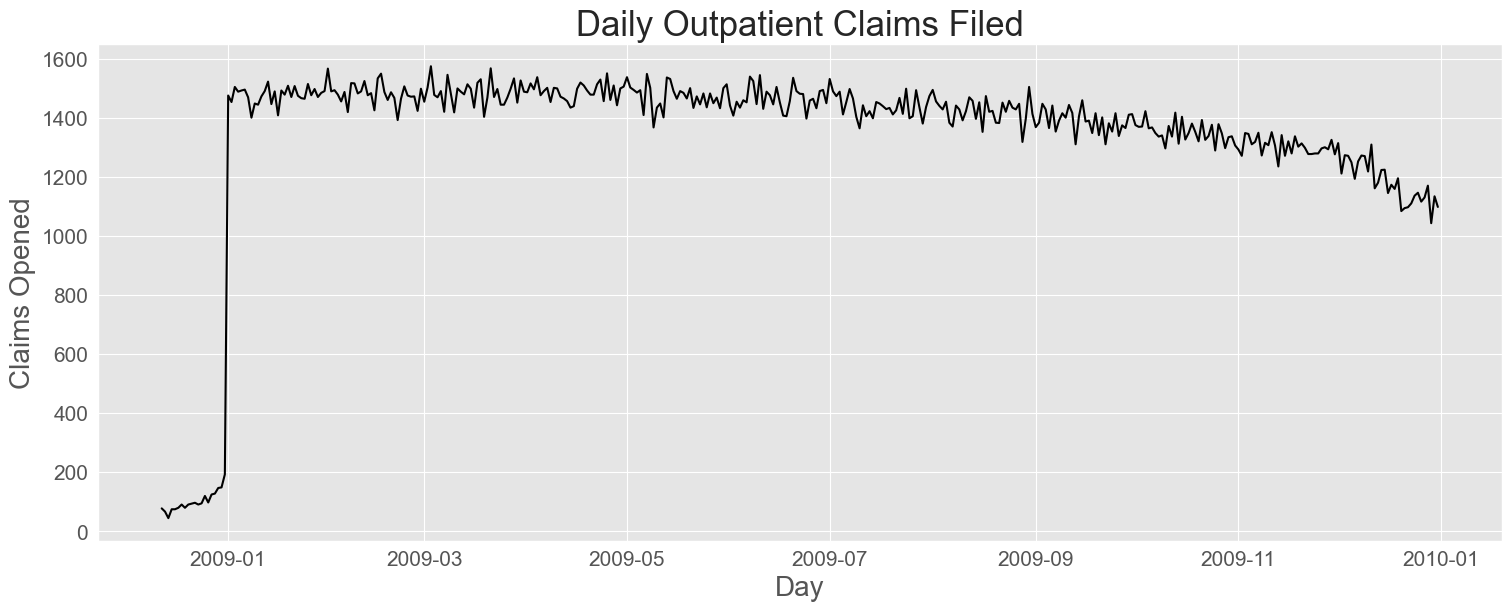

In [65]:
# visualize the time series
plot_series(df=outpatient_daily,
            id_col="unique_id",
            time_col="ds",
            target_col="y",
            ylabel="Claims Opened",
            xlabel="Day",
            title="Daily Outpatient Claims Filed"
           )

Is there some holiday effect here at the start and end of the dataset? Or data collection issues? Fewer claims filed around the turn of the year? Does this coincide with an enrollment period? 

# What are the weekly patterns (weekly seasonalities) you observe for the demands on inpatient or outpatient services?

### Inpatient

In [70]:
inpatient_daily

,ds,y,unique_id
0,2008-11-27,2,claim_volume
1,2008-11-28,2,claim_volume
2,2008-11-29,2,claim_volume
3,2008-11-30,0,claim_volume
4,2008-12-01,3,claim_volume
...,...,...,...
395,2009-12-27,57,claim_volume
396,2009-12-28,45,claim_volume
397,2009-12-29,23,claim_volume
398,2009-12-30,8,claim_volume


/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_13669/3317455971.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


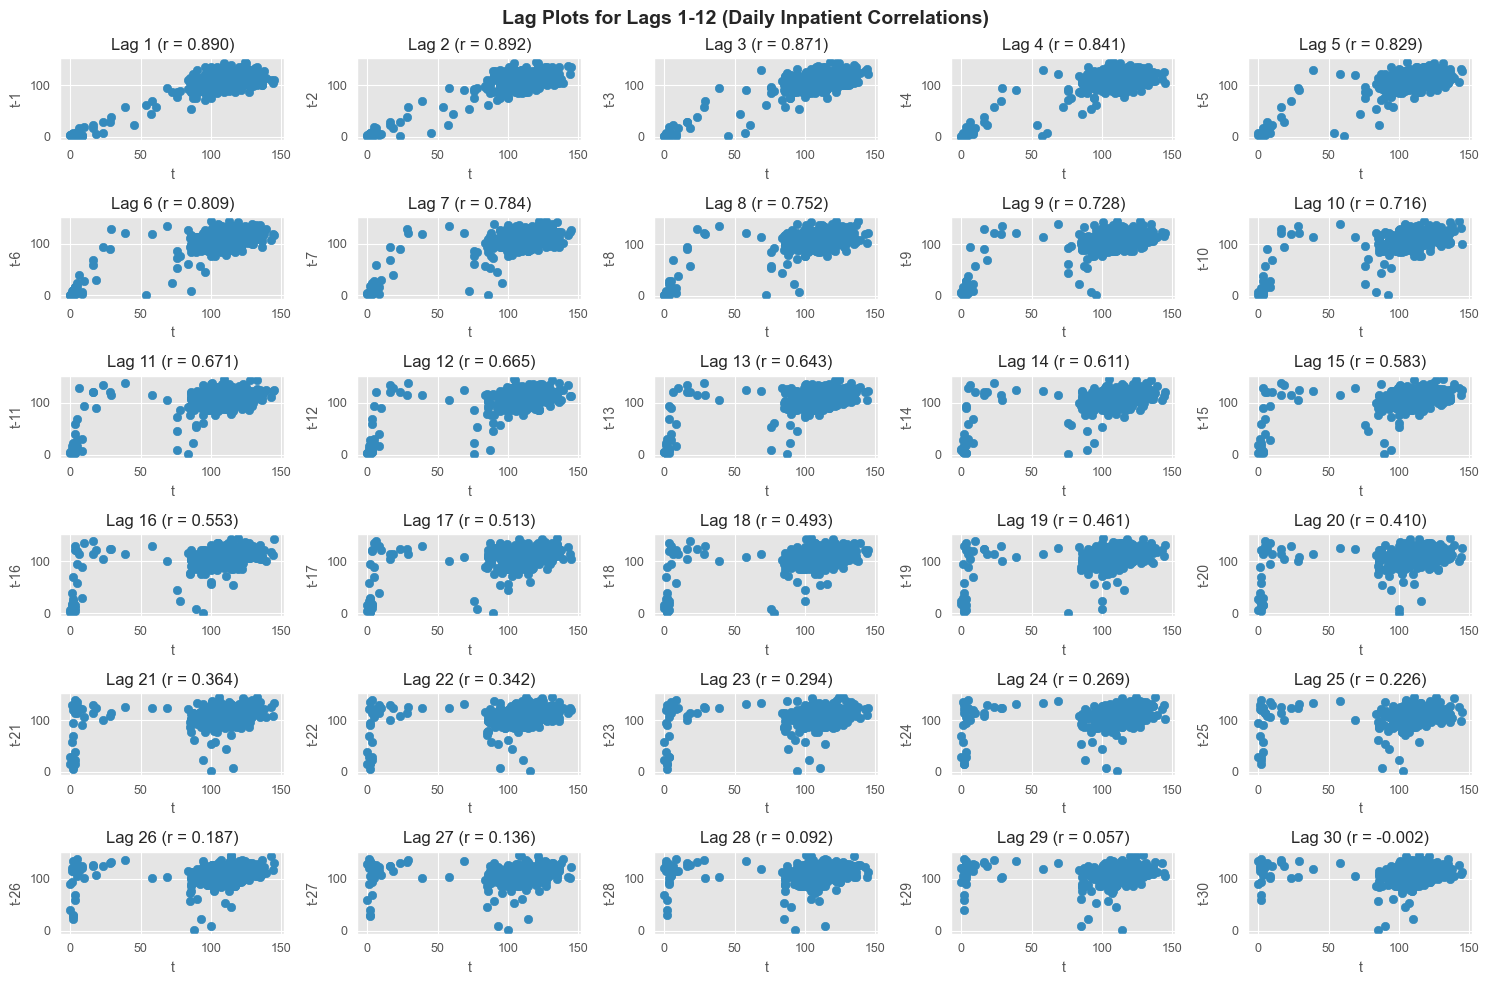

In [72]:
from pandas.plotting import lag_plot
inpatient_daily_indexed = inpatient_daily.set_index('ds')

# look at first 30 lags (1 month of data)
fig, axes = plt.subplots(6, 5, figsize=(15, 10))
fig.suptitle('Lag Plots for Lags 1-12 (Daily Inpatient Correlations)', fontsize=14, fontweight='bold')

for i, ax in enumerate(axes.flat, start=1):
    lag_plot(inpatient_daily_indexed['y'], lag=i, ax=ax)
    # Calculate correlation
    corr = inpatient_daily_indexed['y'].autocorr(lag=i)
    ax.set_title(f'Lag {i} (r = {corr:.3f})')
    ax.set_xlabel(f't')
    ax.set_ylabel(f't-{i}')
    
plt.tight_layout()
plt.show()

Strong correlations over a week or so, and then decreasing. Looking at lags 7, 14, 21, 28, correlation continues to decrease.

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_13669/251825068.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


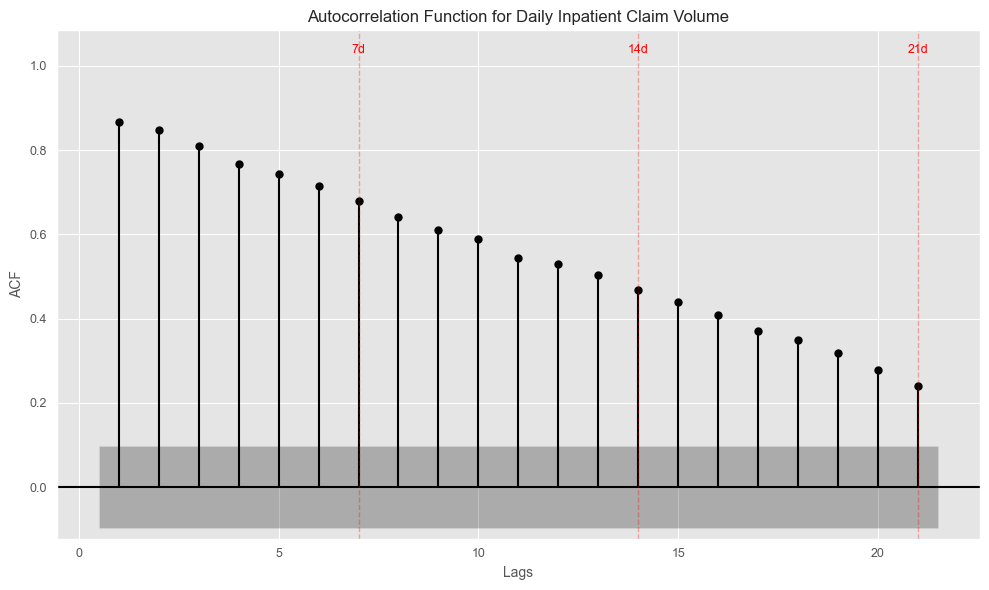

In [82]:
# plot ACF
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(inpatient_daily["y"], lags=21,
         ax=ax,
         zero=False, bartlett_confint=False, auto_ylims=True)

ax.set_title("Autocorrelation Function for Daily Inpatient Claim Volume")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

# Highlight weekly lags
for lag in [7, 14, 21]:
    ax.axvline(x=lag, color='red', linestyle='--', alpha=0.3, linewidth=1)
    ax.text(lag, ax.get_ylim()[1]*0.95, f'{lag}d', ha='center', fontsize=9, color='red')

plt.tight_layout()
plt.show()

High short-term autocorrelation. 

### Outpatient

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_13669/2571782700.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


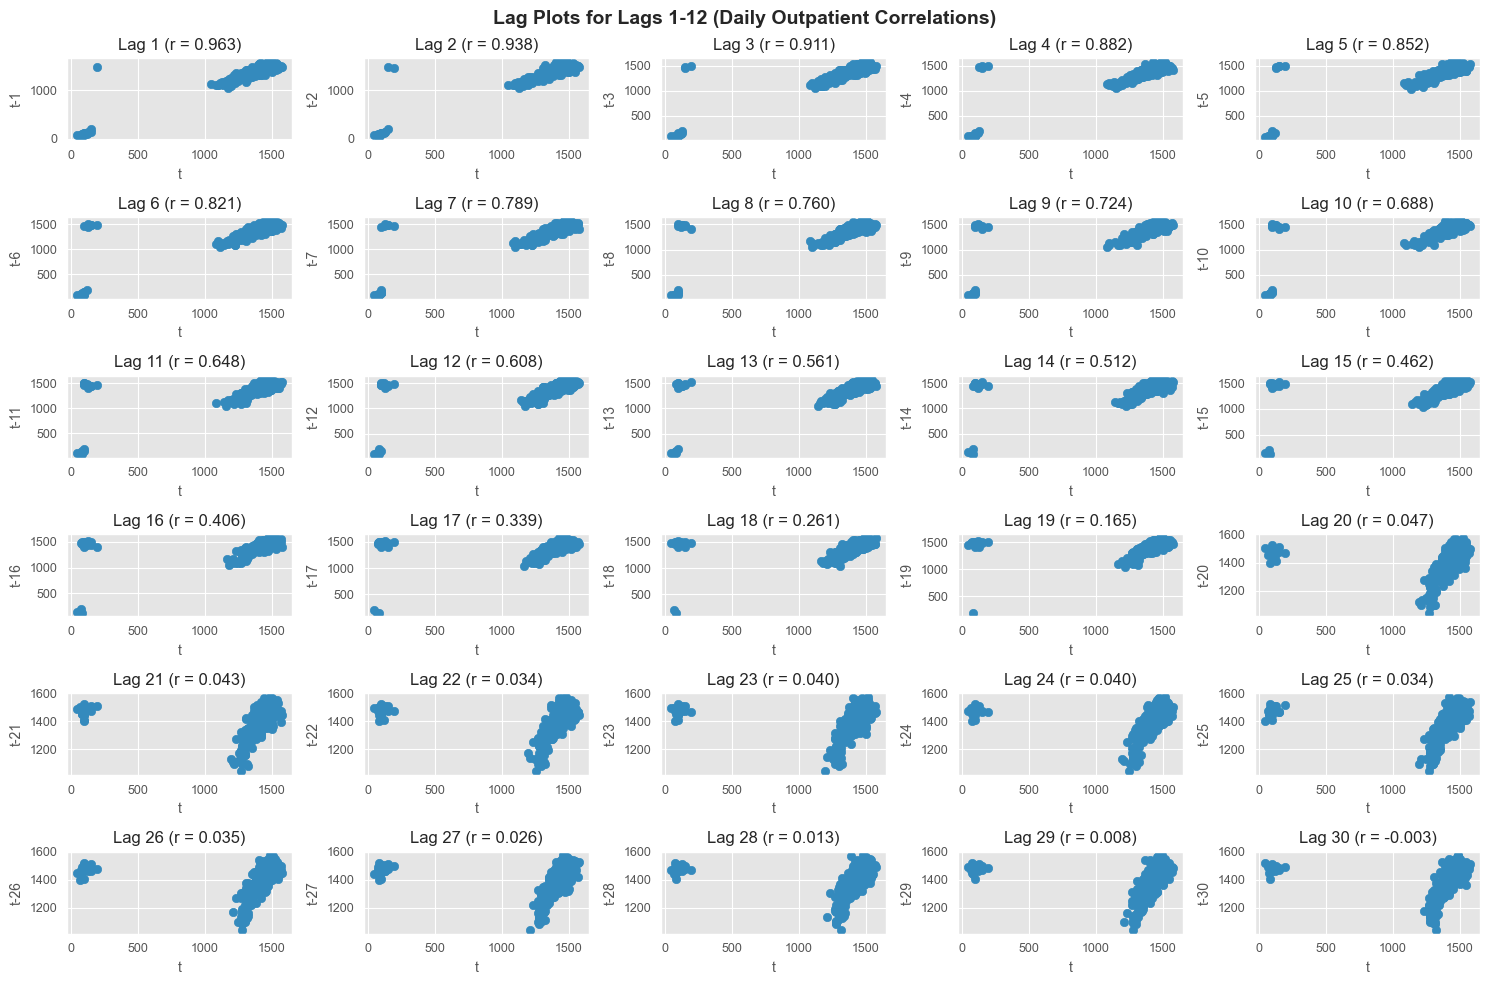

In [84]:
from pandas.plotting import lag_plot
outpatient_daily_indexed = outpatient_daily.set_index('ds')

# look at first 30 lags (1 month of data)
fig, axes = plt.subplots(6, 5, figsize=(15, 10))
fig.suptitle('Lag Plots for Lags 1-12 (Daily Outpatient Correlations)', fontsize=14, fontweight='bold')

for i, ax in enumerate(axes.flat, start=1):
    lag_plot(outpatient_daily_indexed['y'], lag=i, ax=ax)
    # Calculate correlation
    corr = outpatient_daily_indexed['y'].autocorr(lag=i)
    ax.set_title(f'Lag {i} (r = {corr:.3f})')
    ax.set_xlabel(f't')
    ax.set_ylabel(f't-{i}')
    
plt.tight_layout()
plt.show()

/var/folders/tn/yy89yz_94q5b571nxcz7c_2m0000gn/T/ipykernel_13669/2625458394.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


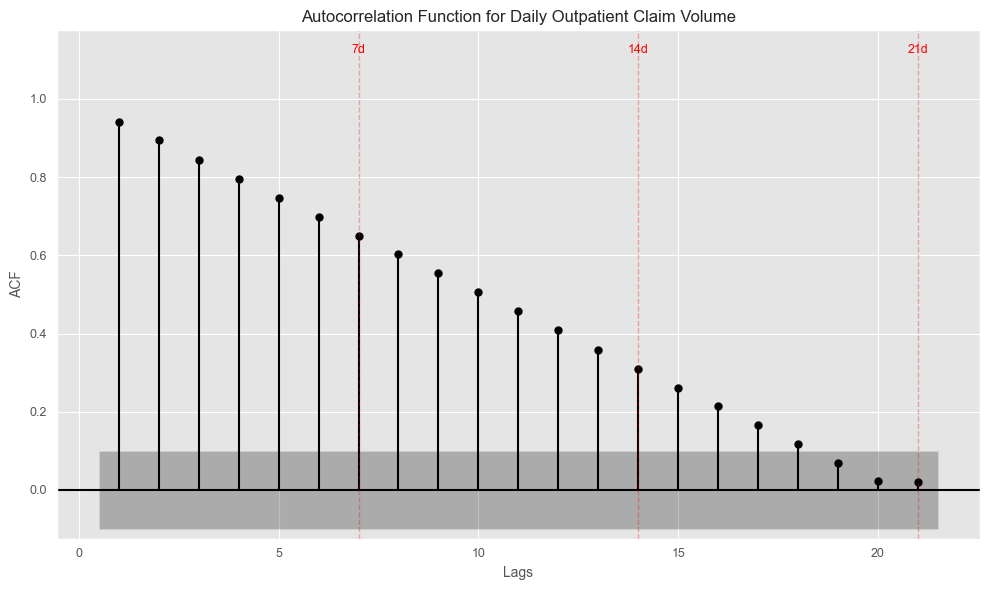

In [86]:
# plot ACF
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(outpatient_daily["y"], lags=21,
         ax=ax,
         zero=False, bartlett_confint=False, auto_ylims=True)

ax.set_title("Autocorrelation Function for Daily Outpatient Claim Volume")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

# Highlight weekly lags
for lag in [7, 14, 21]:
    ax.axvline(x=lag, color='red', linestyle='--', alpha=0.3, linewidth=1)
    ax.text(lag, ax.get_ylim()[1]*0.95, f'{lag}d', ha='center', fontsize=9, color='red')

plt.tight_layout()
plt.show()

I don't see weekly seasonality in either Inpatient or Outpatient data. I see that a strong correlation a few days out, but not any repeating cycle.

# Identify the top 5 most frequent ClmAdmitDiagnosisCodes and trace their weekly seasonalities. Display the patterns you find.

In [90]:
diagnosis_cols = [
   'ClmDiagnosisCode_1',
   'ClmDiagnosisCode_2',
   'ClmDiagnosisCode_3',
   'ClmDiagnosisCode_4',
   'ClmDiagnosisCode_5',
   'ClmDiagnosisCode_6',
   'ClmDiagnosisCode_7',
   'ClmDiagnosisCode_8',
   'ClmDiagnosisCode_9',
   'ClmDiagnosisCode_10'
]

In [92]:
inpatient[diagnosis_cols]

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
0,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN
1,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN
3,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN
4,042,3051,34400,5856,42732,486,5119,29620,20300,NaN
...,...,...,...,...,...,...,...,...,...,...
40469,2851,2762,53550,V0254,V1005,5173,79092,70704,2869,4148
40470,42823,4148,4019,3970,4241,V1042,49122,4254,5990,NaN
40471,4280,3963,5859,4019,40390,4111,71534,71590,V4502,NaN
40472,7802,5859,496,2809,V1254,42822,4263,0414,41400,NaN


Reshape data for counting. stack() drops NaN values. dropna=False keeps them. value_counts() sorts automatically.

In [95]:
# create a Series of codes for counting
inpatient[diagnosis_cols].stack()

0      ClmDiagnosisCode_1     1970
       ClmDiagnosisCode_2     4019
       ClmDiagnosisCode_3     5853
       ClmDiagnosisCode_4     7843
       ClmDiagnosisCode_5     2768
                             ...  
40473  ClmDiagnosisCode_5    42830
       ClmDiagnosisCode_6      412
       ClmDiagnosisCode_7     4019
       ClmDiagnosisCode_8     2800
       ClmDiagnosisCode_9    27801
Length: 327328, dtype: object

In [97]:
inpatient[diagnosis_cols].stack().value_counts()

4019     14153
2724      7340
25000     7334
41401     6442
4280      6190
         ...  
45939        1
9065         1
65231        1
6926         1
2212         1
Name: count, Length: 4716, dtype: int64

In [99]:
# get the top 5 for inpatient and outpatient
print('top 5 inpatient diagnosis codes and counts:')
print(inpatient[diagnosis_cols].stack().value_counts().head())
print('top 5 outpatient diagnosis codes and counts:')
print(outpatient[diagnosis_cols].stack().value_counts().head())

top 5 inpatient diagnosis codes and counts:
4019     14153
2724      7340
25000     7334
41401     6442
4280      6190
Name: count, dtype: int64
top 5 outpatient diagnosis codes and counts:
4019     62903
25000    30022
2724     28423
V5869    24359
4011     23534
Name: count, dtype: int64


### Trace the weekly seasonalities of these top 5 codes in each dataframe

Retrieve the top 5 codes appearing in each dataframe

In [102]:
inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [104]:
# create a list of top 5 diagnosis codes for each group of beneficiaries
top_5_inpatient_codes = inpatient[diagnosis_cols].stack().value_counts().head().index.to_list()
top_5_outpatient_codes = outpatient[diagnosis_cols].stack().value_counts().head().index.to_list()
top_5_outpatient_codes

['4019', '25000', '2724', 'V5869', '4011']

Reshape data for counting. melt() does the opposite of stack(). it stacks column upon column, not row on row.

In [107]:
inpatient[diagnosis_cols].melt()

,variable,value
0,ClmDiagnosisCode_1,1970
1,ClmDiagnosisCode_1,6186
2,ClmDiagnosisCode_1,29623
3,ClmDiagnosisCode_1,43491
4,ClmDiagnosisCode_1,042
...,...,...
404735,ClmDiagnosisCode_10,4148
404736,ClmDiagnosisCode_10,NaN
404737,ClmDiagnosisCode_10,NaN
404738,ClmDiagnosisCode_10,NaN


In [109]:
# add date column
(inpatient[diagnosis_cols + ['ClaimStartDt']]).melt()

,variable,value
0,ClmDiagnosisCode_1,1970
1,ClmDiagnosisCode_1,6186
2,ClmDiagnosisCode_1,29623
3,ClmDiagnosisCode_1,43491
4,ClmDiagnosisCode_1,042
...,...,...
445209,ClaimStartDt,2009-09-28 00:00:00
445210,ClaimStartDt,2009-11-03 00:00:00
445211,ClaimStartDt,2009-11-18 00:00:00
445212,ClaimStartDt,2009-12-17 00:00:00


In [111]:
# keep date as a separate column, melting all the code columns
(inpatient[diagnosis_cols + ['ClaimStartDt']]).melt(
    id_vars=['ClaimStartDt']
)

,ClaimStartDt,variable,value
0,2009-04-12,ClmDiagnosisCode_1,1970
1,2009-08-31,ClmDiagnosisCode_1,6186
2,2009-09-17,ClmDiagnosisCode_1,29623
3,2009-02-14,ClmDiagnosisCode_1,43491
4,2009-08-13,ClmDiagnosisCode_1,042
...,...,...,...
404735,2009-09-28,ClmDiagnosisCode_10,4148
404736,2009-11-03,ClmDiagnosisCode_10,NaN
404737,2009-11-18,ClmDiagnosisCode_10,NaN
404738,2009-12-17,ClmDiagnosisCode_10,NaN


In [113]:
(inpatient[diagnosis_cols + ['ClaimStartDt']]).melt(
    id_vars=['ClaimStartDt'],
    value_vars=diagnosis_cols # only other columns in df, so this is default
)

,ClaimStartDt,variable,value
0,2009-04-12,ClmDiagnosisCode_1,1970
1,2009-08-31,ClmDiagnosisCode_1,6186
2,2009-09-17,ClmDiagnosisCode_1,29623
3,2009-02-14,ClmDiagnosisCode_1,43491
4,2009-08-13,ClmDiagnosisCode_1,042
...,...,...,...
404735,2009-09-28,ClmDiagnosisCode_10,4148
404736,2009-11-03,ClmDiagnosisCode_10,NaN
404737,2009-11-18,ClmDiagnosisCode_10,NaN
404738,2009-12-17,ClmDiagnosisCode_10,NaN


In [115]:
(inpatient[diagnosis_cols + ['ClaimStartDt']]).melt(
    id_vars=['ClaimStartDt'],
    value_vars=diagnosis_cols,   # only other columns in df, so this is default
    value_name='diagnosis_code'  # relable column name
)

,ClaimStartDt,variable,diagnosis_code
0,2009-04-12,ClmDiagnosisCode_1,1970
1,2009-08-31,ClmDiagnosisCode_1,6186
2,2009-09-17,ClmDiagnosisCode_1,29623
3,2009-02-14,ClmDiagnosisCode_1,43491
4,2009-08-13,ClmDiagnosisCode_1,042
...,...,...,...
404735,2009-09-28,ClmDiagnosisCode_10,4148
404736,2009-11-03,ClmDiagnosisCode_10,NaN
404737,2009-11-18,ClmDiagnosisCode_10,NaN
404738,2009-12-17,ClmDiagnosisCode_10,NaN


In [117]:
# save this and create one for outpatient
inpatient_long = (inpatient[diagnosis_cols + ['ClaimStartDt']]).melt(
    id_vars=['ClaimStartDt'],
    value_vars=diagnosis_cols,   # only other columns in df, so this is default
    value_name='diagnosis_code'  # relable column name
)

outpatient_long = (outpatient[diagnosis_cols + ['ClaimStartDt']]).melt(
    id_vars=['ClaimStartDt'],
    value_vars=diagnosis_cols,   # only other columns in df, so this is default
    value_name='diagnosis_code'  # relable column name
)

In [119]:
# filter for top 5 most common diagnosis codes
inpatient_long[inpatient_long['diagnosis_code'].isin(top_5_inpatient_codes)]

,ClaimStartDt,variable,diagnosis_code
22,2009-03-06,ClmDiagnosisCode_1,41401
61,2009-04-06,ClmDiagnosisCode_1,41401
84,2009-09-30,ClmDiagnosisCode_1,41401
106,2009-05-10,ClmDiagnosisCode_1,41401
116,2009-05-05,ClmDiagnosisCode_1,4280
...,...,...,...
404295,2009-10-24,ClmDiagnosisCode_10,41401
404390,2009-07-26,ClmDiagnosisCode_10,25000
404558,2009-07-12,ClmDiagnosisCode_10,4019
404611,2009-09-04,ClmDiagnosisCode_10,25000


In [121]:
# save this and create one for outpatient
inpatient_top5 = inpatient_long[inpatient_long['diagnosis_code'].isin(top_5_inpatient_codes)]
outpatient_top5 = outpatient_long[outpatient_long['diagnosis_code'].isin(top_5_outpatient_codes)]

In [123]:
outpatient_top5

,ClaimStartDt,variable,diagnosis_code
16,2009-02-02,ClmDiagnosisCode_1,2724
20,2009-04-02,ClmDiagnosisCode_1,4019
25,2009-05-10,ClmDiagnosisCode_1,4019
50,2009-01-29,ClmDiagnosisCode_1,4019
52,2009-06-07,ClmDiagnosisCode_1,4019
...,...,...,...
5166814,2009-08-22,ClmDiagnosisCode_10,2724
5168055,2009-12-21,ClmDiagnosisCode_10,4019
5168346,2009-06-09,ClmDiagnosisCode_10,4019
5174245,2009-11-10,ClmDiagnosisCode_10,25000


In [125]:
print(f'inpatient_long should have {inpatient[diagnosis_cols].stack().value_counts().head().values.sum()} rows')
print(f'outpatient_long should have {outpatient[diagnosis_cols].stack().value_counts().head().values.sum()} rows')

inpatient_long should have 41459 rows
outpatient_long should have 169241 rows


Looks good.

In [128]:
# extract week number and day of week
inpatient_top5 = inpatient_top5.copy()
outpatient_top5 = outpatient_top5.copy()

inpatient_top5['week_of_year'] = inpatient_top5['ClaimStartDt'].dt.isocalendar().week
inpatient_top5['day_of_week'] = inpatient_top5['ClaimStartDt'].dt.day_name()

outpatient_top5['week_of_year'] = outpatient_top5['ClaimStartDt'].dt.isocalendar().week
outpatient_top5['day_of_week'] = outpatient_top5['ClaimStartDt'].dt.day_name()

In [130]:
inpatient_top5.head(2)

,ClaimStartDt,variable,diagnosis_code,week_of_year,day_of_week
22,2009-03-06,ClmDiagnosisCode_1,41401,10,Friday
61,2009-04-06,ClmDiagnosisCode_1,41401,15,Monday


In [132]:
# count by week and code: 'in week_of_year, 'diagnosis_code' appears __ times
inpatient_top5.groupby(['week_of_year', 'diagnosis_code']).size()

week_of_year  diagnosis_code
1             25000             150
              2724              147
              4019              286
              41401             127
              4280              134
                               ... 
53            25000              11
              2724               17
              4019               28
              41401              12
              4280               15
Length: 265, dtype: int64

Reshape the data into a table for plotting and fill observations that have no combinations (NaNs) with 0s

In [135]:
inpatient_top5.groupby(['week_of_year', 'diagnosis_code']).size().unstack(fill_value=0)

diagnosis_code,25000,2724,4019,41401,4280
week_of_year,,,,,
1,150,147,286,127,134
2,140,151,304,130,117
3,138,165,287,124,127
4,143,153,297,136,109
5,170,170,276,137,137
6,168,135,310,145,113
7,164,157,321,136,141
8,151,158,285,133,133
9,144,137,314,134,121


In [137]:
# save and do the same for outpatient
inpatient_weekly_counts = inpatient_top5.groupby(['week_of_year', 'diagnosis_code']).size().unstack(fill_value=0)
outpatient_weekly_counts = outpatient_top5.groupby(['week_of_year', 'diagnosis_code']).size().unstack(fill_value=0)

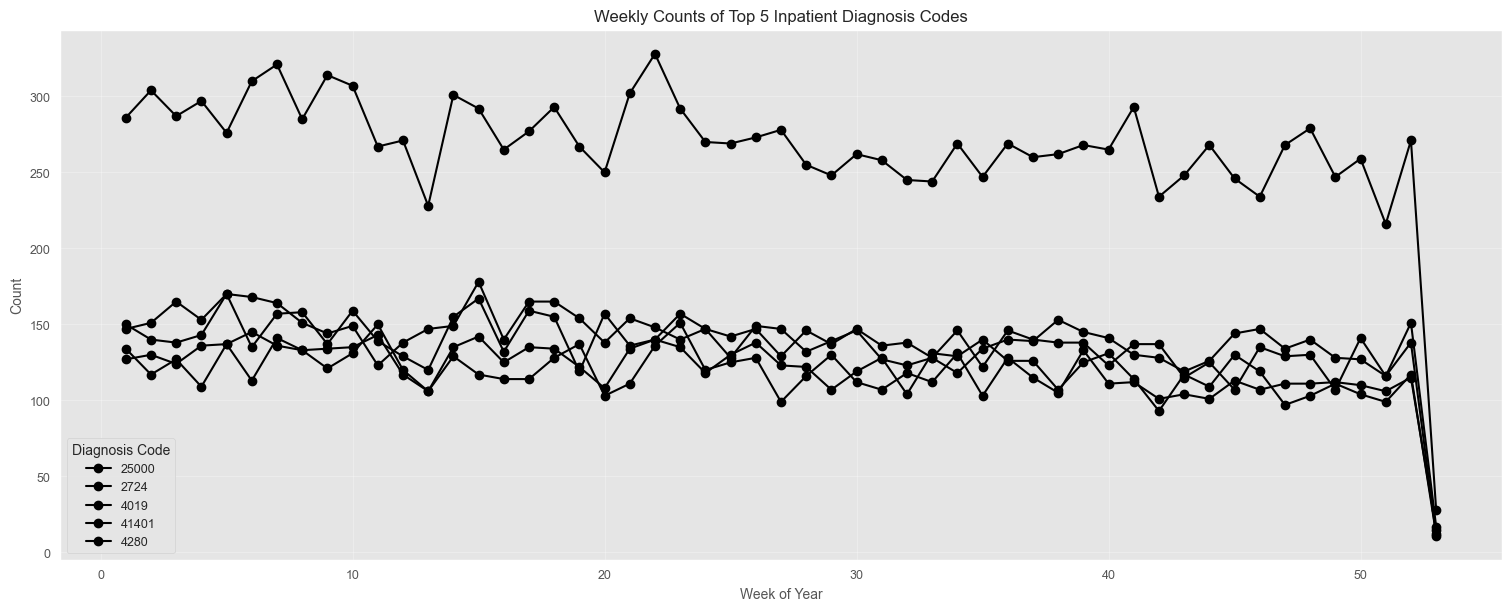

In [139]:
# visualize the data
inpatient_weekly_counts.plot(figsize=(15, 6), marker='o')
plt.title('Weekly Counts of Top 5 Inpatient Diagnosis Codes')
plt.xlabel('Week of Year')
plt.ylabel('Count')
plt.legend(title='Diagnosis Code')
plt.grid(True, alpha=0.3)
plt.show()

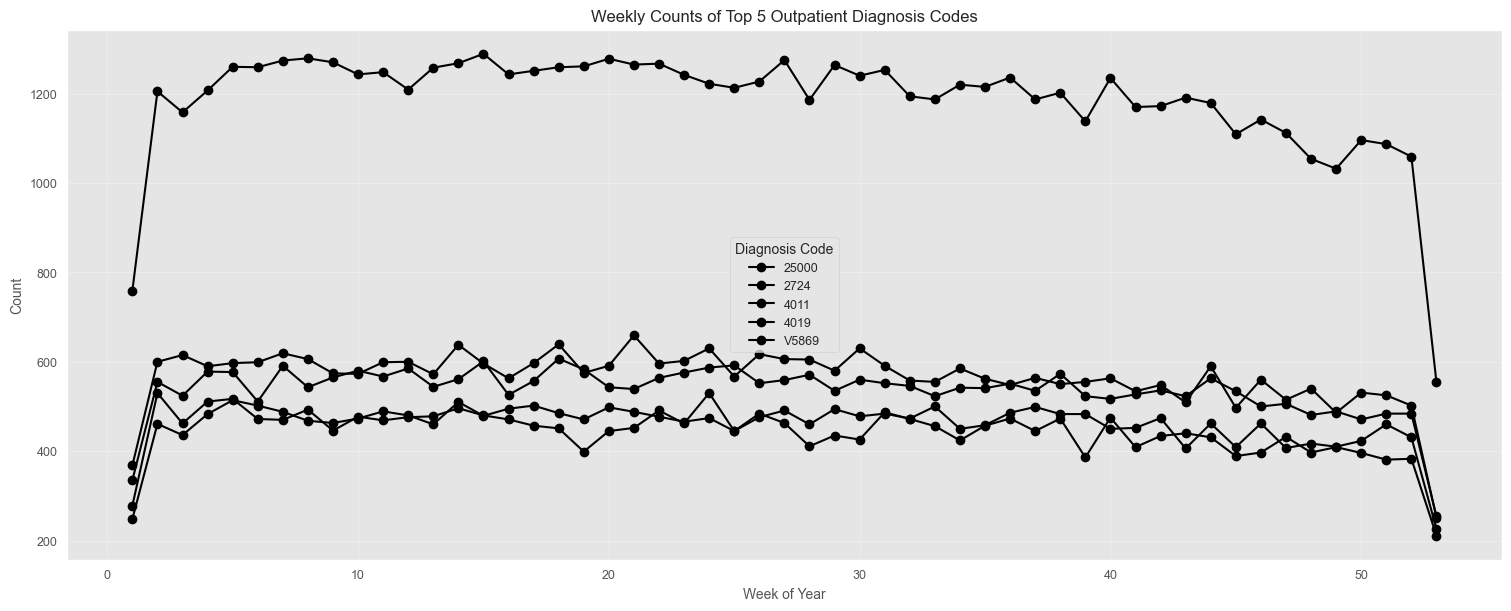

In [141]:
# visualize the data
outpatient_weekly_counts.plot(figsize=(15, 6), marker='o')
plt.title('Weekly Counts of Top 5 Outpatient Diagnosis Codes')
plt.xlabel('Week of Year')
plt.ylabel('Count')
plt.legend(title='Diagnosis Code')
plt.grid(True, alpha=0.3)
plt.show()

# For the inpatient patients, is there any pattern between the durations of the treatments and the patient attributes?

Duration of treatment is measured as the period between AdmissionDt and DischargeDt.

Create a column in inpatient with days for this period and examine for Gender, Race, Age, and State of residence.

In [144]:
inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [146]:
# create treatment duration column
inpatient_df = inpatient.copy()
outpatient_df = outpatient.copy()

In [148]:
inpatient_df[['AdmissionDt', 'DischargeDt']]

,AdmissionDt,DischargeDt
0,2009-04-12,2009-04-18
1,2009-08-31,2009-09-02
2,2009-09-17,2009-09-20
3,2009-02-14,2009-02-22
4,2009-08-13,2009-08-30
...,...,...
40469,2009-09-28,2009-10-02
40470,2009-11-03,2009-11-06
40471,2009-11-18,2009-11-22
40472,2009-12-17,2009-12-18


In [150]:
(inpatient_df['DischargeDt'] - inpatient_df['AdmissionDt']).dt.days

0         6
1         2
2         3
3         8
4        17
         ..
40469     4
40470     3
40471     4
40472     1
40473     8
Length: 40474, dtype: int64

In [152]:
inpatient_df['TreatmentDuration'] = (inpatient_df['DischargeDt'] - inpatient_df['AdmissionDt']).dt.days 

In [154]:
inpatient_df.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,TreatmentDuration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17


### How to combine this with beneficiary to look at patient attributes

Is this a time series question? Or looking at relationship between treatment duration and patient attributes? 

- Combine the TreatmentDuration for each claim, into a sum total for each beneficiary
- Add this data to beneficiary dataset for plotting

In [157]:
# extract combined treatment durations and rename column
inpatient_duration = inpatient_df.groupby('BeneID')[['TreatmentDuration']].sum().reset_index()
inpatient_duration = inpatient_duration.rename(
    columns={'TreatmentDuration':'AnnualTreatmentDuration'}
)
inpatient_duration

,BeneID,AnnualTreatmentDuration
0,BENE100002,25
1,BENE100004,2
2,BENE100006,6
3,BENE100007,4
4,BENE100010,18
...,...,...
31284,BENE99965,2
31285,BENE99974,6
31286,BENE99976,6
31287,BENE99984,2


In [159]:
beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [161]:
inpatient_duration_df = inpatient_duration.merge(
    beneficiary[['BeneID', 'Race', 'Gender', 'State', 'DOB']], 
    on='BeneID', 
    how='left'
)
inpatient_duration_df

,BeneID,AnnualTreatmentDuration,Race,Gender,State,DOB
0,BENE100002,25,2,2,33,1938-09-01
1,BENE100004,2,1,2,15,1943-06-01
2,BENE100006,6,1,2,50,1952-01-01
3,BENE100007,4,1,1,32,1939-03-01
4,BENE100010,18,1,1,39,1927-10-01
...,...,...,...,...,...,...
31284,BENE99965,2,1,1,5,1936-09-01
31285,BENE99974,6,1,2,23,1934-10-01
31286,BENE99976,6,1,1,33,1929-08-01
31287,BENE99984,2,1,2,45,1948-12-01


In [163]:
inpatient['ClaimStartDt'].max()

Timestamp('2009-12-31 00:00:00')

In [165]:
# create an age column, based on the last date collected in inpatient data
print('last claim date in inpatient dataframe:')
inpatient['ClaimStartDt'].max()

last claim date in inpatient dataframe:


Timestamp('2009-12-31 00:00:00')

In [167]:
# change DOB to date time
inpatient_duration_df['DOB'] = pd.to_datetime(inpatient_duration_df['DOB'])
inpatient_duration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31289 entries, 0 to 31288
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   BeneID                   31289 non-null  object        
 1   AnnualTreatmentDuration  31289 non-null  int64         
 2   Race                     31289 non-null  int64         
 3   Gender                   31289 non-null  int64         
 4   State                    31289 non-null  int64         
 5   DOB                      31289 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.4+ MB


In [169]:
# create an integral inpatient age at time of last claim for inpatient data collection
inpatient_duration_df['InpatientAge'] = (
    (pd.to_datetime('2009-12-31') - inpatient_duration_df['DOB']).dt.days / 365.25
).astype(int)

In [171]:
inpatient_duration_df.head()

,BeneID,AnnualTreatmentDuration,Race,Gender,State,DOB,InpatientAge
0,BENE100002,25,2,2,33,1938-09-01,71
1,BENE100004,2,1,2,15,1943-06-01,66
2,BENE100006,6,1,2,50,1952-01-01,57
3,BENE100007,4,1,1,32,1939-03-01,70
4,BENE100010,18,1,1,39,1927-10-01,82


In [173]:
# bin the inpatient age into age groups
inpatient_duration_df['InpatientAgeGroup'] = pd.cut(
    inpatient_duration_df['InpatientAge'], 
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 
    labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+'],
    right=False  # makes bins like [0, 10) instead of (0, 10]
)

In [175]:
inpatient_duration_df.head()

,BeneID,AnnualTreatmentDuration,Race,Gender,State,DOB,InpatientAge,InpatientAgeGroup
0,BENE100002,25,2,2,33,1938-09-01,71,70-79
1,BENE100004,2,1,2,15,1943-06-01,66,60-69
2,BENE100006,6,1,2,50,1952-01-01,57,50-59
3,BENE100007,4,1,1,32,1939-03-01,70,70-79
4,BENE100010,18,1,1,39,1927-10-01,82,80-89


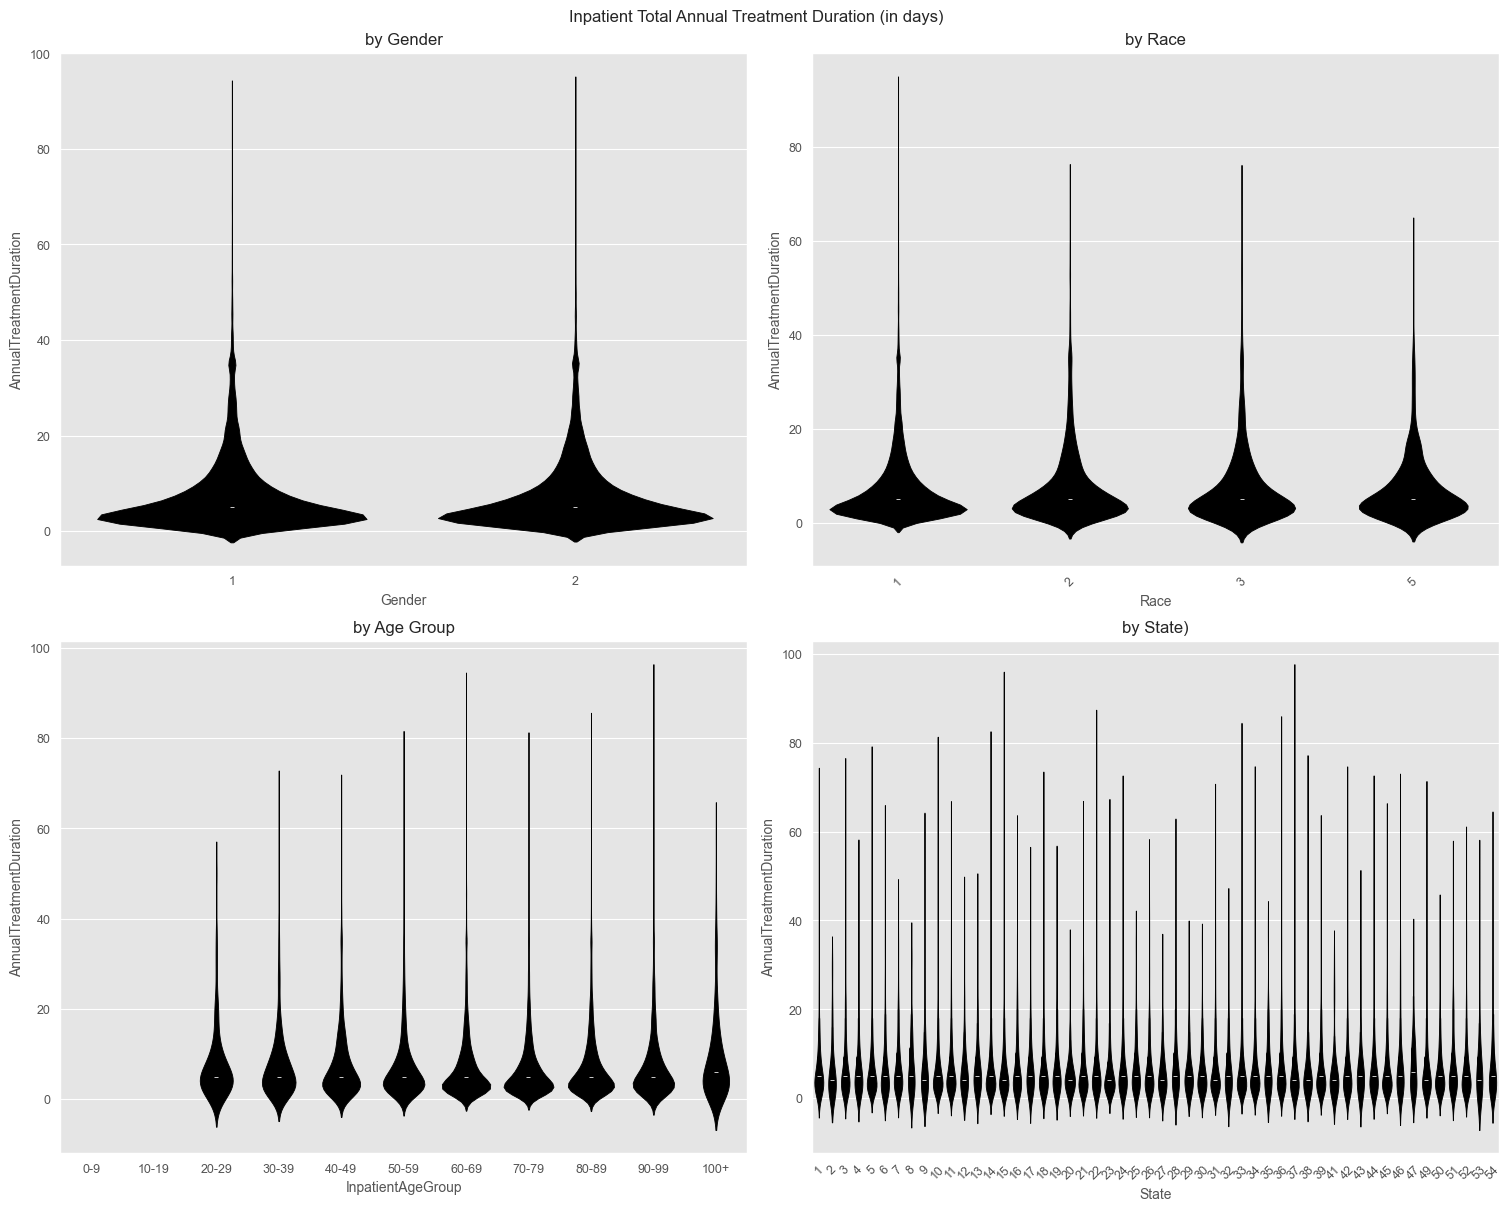

In [177]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=inpatient_duration_df, x='Gender', y='AnnualTreatmentDuration', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=inpatient_duration_df, x='Race', y='AnnualTreatmentDuration', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=inpatient_duration_df, x='InpatientAgeGroup', y='AnnualTreatmentDuration', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=inpatient_duration_df, x='State', y='AnnualTreatmentDuration', ax=axes[1, 1])
axes[1, 1].set_title('by State)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Inpatient Total Annual Treatment Duration (in days)')
plt.show()

?

# For the monthly inpatient/outpatient claim counts of all the providers, please analyze the table of provider-month matrices and report any interesting findings.

Look at the frequency of monthly claims per provider
**hint: dataframe's pivot_table method could be used to construct the provider-month matrix.**

- Get monthly inpatient and outpatient claim counts for all providers
- **what are provider-month matrices?**

In [182]:
# create a column with the month that each claim was filed
inpatient_df['Month'] = inpatient_df['ClaimStartDt'].dt.to_period('M')
outpatient_df['Month'] = outpatient_df['ClaimStartDt'].dt.to_period('M')
outpatient_df.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Month
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,2009-10
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,2009-02


In [184]:
# count how many claims were filed each month by each provider
inpatient_monthly_claims = inpatient_df.groupby(['Provider', 'Month'])['ClaimID'].count().reset_index()
# rename column
inpatient_monthly_claims.rename({'ClaimID':'num_inpatient_claims'}, axis='columns', inplace=True)

# count how many claims were filed each month by each provider
outpatient_monthly_claims = outpatient_df.groupby(['Provider', 'Month'])['ClaimID'].count().reset_index()
# rename column
outpatient_monthly_claims.rename({'ClaimID':'num_outpatient_claims'}, axis='columns', inplace=True)

outpatient_monthly_claims

,Provider,Month,num_outpatient_claims
0,PRV51001,2009-01,2
1,PRV51001,2009-02,2
2,PRV51001,2009-03,3
3,PRV51001,2009-04,2
4,PRV51001,2009-05,3
...,...,...,...
47586,PRV57763,2009-08,16
47587,PRV57763,2009-09,18
47588,PRV57763,2009-10,9
47589,PRV57763,2009-11,13


In [186]:
# add fraud labels
inpatient_monthly_claims = pd.merge(inpatient_monthly_claims, labels, on='Provider', how='outer')
outpatient_monthly_claims = pd.merge(outpatient_monthly_claims, labels, on='Provider', how='outer')

In [188]:
outpatient_monthly_claims

,Provider,Month,num_outpatient_claims,PotentialFraud
0,PRV51001,2009-01,2.0,No
1,PRV51001,2009-02,2.0,No
2,PRV51001,2009-03,3.0,No
3,PRV51001,2009-04,2.0,No
4,PRV51001,2009-05,3.0,No
...,...,...,...,...
47984,PRV57763,2009-08,16.0,No
47985,PRV57763,2009-09,18.0,No
47986,PRV57763,2009-10,9.0,No
47987,PRV57763,2009-11,13.0,No


In [190]:
# create a table of monthly claim frequencies
inpatient_pivot_table = inpatient_df.groupby(['Provider', inpatient['ClaimStartDt'].dt.month]).size().unstack(fill_value=0)
outpatient_pivot_table = outpatient_df.groupby(['Provider', inpatient['ClaimStartDt'].dt.month]).size().unstack(fill_value=0)
outpatient_pivot_table

ClaimStartDt,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Provider,,,,,,,,,,,,
PRV51001,0,0,0,0,0,0,0,0,0,1,0,0
PRV51003,0,2,2,0,1,1,0,0,0,2,1,0
PRV51004,2,2,1,1,0,0,2,0,0,1,0,0
PRV51005,5,5,8,6,10,8,4,5,11,8,7,5
PRV51007,0,0,0,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57756,0,0,0,0,0,0,1,0,0,0,0,2
PRV57759,1,1,0,1,0,0,0,1,0,0,0,0
PRV57760,1,1,1,1,0,0,0,0,0,0,0,0


In [192]:
# create a list of providers suspected of fraud
fraud_providers = labels[labels['PotentialFraud']=='Yes']['Provider'].to_list()
fraud_providers

['PRV51003',
 'PRV51005',
 'PRV51021',
 'PRV51037',
 'PRV51052',
 'PRV51059',
 'PRV51064',
 'PRV51067',
 'PRV51077',
 'PRV51084',
 'PRV51103',
 'PRV51119',
 'PRV51126',
 'PRV51145',
 'PRV51146',
 'PRV51148',
 'PRV51149',
 'PRV51159',
 'PRV51170',
 'PRV51173',
 'PRV51178',
 'PRV51242',
 'PRV51244',
 'PRV51249',
 'PRV51263',
 'PRV51337',
 'PRV51338',
 'PRV51347',
 'PRV51357',
 'PRV51369',
 'PRV51378',
 'PRV51390',
 'PRV51393',
 'PRV51399',
 'PRV51401',
 'PRV51410',
 'PRV51421',
 'PRV51426',
 'PRV51433',
 'PRV51434',
 'PRV51447',
 'PRV51459',
 'PRV51471',
 'PRV51480',
 'PRV51482',
 'PRV51490',
 'PRV51495',
 'PRV51501',
 'PRV51507',
 'PRV51539',
 'PRV51542',
 'PRV51560',
 'PRV51567',
 'PRV51574',
 'PRV51578',
 'PRV51584',
 'PRV51586',
 'PRV51590',
 'PRV51593',
 'PRV51604',
 'PRV51614',
 'PRV51805',
 'PRV51818',
 'PRV51826',
 'PRV51836',
 'PRV51840',
 'PRV51842',
 'PRV51851',
 'PRV51857',
 'PRV51868',
 'PRV51873',
 'PRV51876',
 'PRV51920',
 'PRV51940',
 'PRV51948',
 'PRV51951',
 'PRV51979',

In [194]:
labels.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [196]:
# add fraud suspicion to pivot tables
inpatient_pivot_table['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in inpatient_pivot_table.index
]
outpatient_pivot_table['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in outpatient_pivot_table.index
]

In [198]:
outpatient_pivot_table.head(10)

ClaimStartDt,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,fraud_suspected
Provider,,,,,,,,,,,,,
PRV51001,0,0,0,0,0,0,0,0,0,1,0,0,N
PRV51003,0,2,2,0,1,1,0,0,0,2,1,0,Y
PRV51004,2,2,1,1,0,0,2,0,0,1,0,0,N
PRV51005,5,5,8,6,10,8,4,5,11,8,7,5,Y
PRV51007,0,0,0,0,1,1,1,0,1,0,0,0,N
PRV51008,0,0,1,0,0,0,1,0,0,0,0,0,N
PRV51011,1,0,1,1,1,0,0,0,0,3,0,0,N
PRV51012,1,0,0,0,0,0,0,0,0,0,0,0,N
PRV51013,1,0,0,0,0,0,0,0,0,0,0,1,N


In [204]:
# create a table of monthly claim frequencies
inpatient_pivot_table = inpatient_df.groupby(['Provider', inpatient['ClaimStartDt'].dt.month]).size().unstack(fill_value=0)
outpatient_pivot_table = outpatient_df.groupby(['Provider', inpatient['ClaimStartDt'].dt.month]).size().unstack(fill_value=0)
outpatient_pivot_table

ClaimStartDt,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Provider,,,,,,,,,,,,
PRV51001,0,0,0,0,0,0,0,0,0,1,0,0
PRV51003,0,2,2,0,1,1,0,0,0,2,1,0
PRV51004,2,2,1,1,0,0,2,0,0,1,0,0
PRV51005,5,5,8,6,10,8,4,5,11,8,7,5
PRV51007,0,0,0,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57756,0,0,0,0,0,0,1,0,0,0,0,2
PRV57759,1,1,0,1,0,0,0,1,0,0,0,0
PRV57760,1,1,1,1,0,0,0,0,0,0,0,0


In [206]:
# add fraud status (back) to pivot tables
inpatient_pivot_table['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in inpatient_pivot_table.index
]
outpatient_pivot_table['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in outpatient_pivot_table.index
]

In [208]:
outpatient_pivot_table

ClaimStartDt,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,fraud_suspected
Provider,,,,,,,,,,,,,
PRV51001,0,0,0,0,0,0,0,0,0,1,0,0,N
PRV51003,0,2,2,0,1,1,0,0,0,2,1,0,Y
PRV51004,2,2,1,1,0,0,2,0,0,1,0,0,N
PRV51005,5,5,8,6,10,8,4,5,11,8,7,5,Y
PRV51007,0,0,0,0,1,1,1,0,1,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57756,0,0,0,0,0,0,1,0,0,0,0,2,N
PRV57759,1,1,0,1,0,0,0,1,0,0,0,0,N
PRV57760,1,1,1,1,0,0,0,0,0,0,0,0,N


In [210]:
# look at the statistics for each group of fraud/non-fraud in IP/OP
inpatient_non_fraud_stats = inpatient_pivot_table[inpatient_pivot_table['fraud_suspected'] == 'N'].iloc[:, :-1].describe()
inpatient_fraud_stats = inpatient_pivot_table[inpatient_pivot_table['fraud_suspected'] == 'Y'].iloc[:, :-1].describe()

print("\nNon-Fraud IPProviders:")
print(inpatient_non_fraud_stats)
print("Fraud Suspected IPProviders:")
print(inpatient_fraud_stats)


Non-Fraud IPProviders:
ClaimStartDt         1         2         3         4         5        6  \
count         1652.000  1652.000  1652.000  1652.000  1652.000  1652.00   
mean             0.956     0.839     0.903     0.907     0.931     0.88   
std              1.515     1.379     1.455     1.451     1.565     1.46   
min              0.000     0.000     0.000     0.000     0.000     0.00   
25%              0.000     0.000     0.000     0.000     0.000     0.00   
50%              0.000     0.000     0.000     0.000     0.000     0.00   
75%              1.000     1.000     1.000     1.000     1.000     1.00   
max             13.000    11.000    15.000    12.000    16.000    13.00   

ClaimStartDt         7         8         9        10        11        12  
count         1652.000  1652.000  1652.000  1652.000  1652.000  1652.000  
mean             0.858     0.846     0.826     0.815     0.760     0.812  
std              1.453     1.455     1.394     1.359     1.329     1.355  


INPATIENT PROVIDERS not suspected of fraud:
- range of mean claims per month: 0.760 - 0.956
- maximum claims per month: 16

INPATIENT PROVIDERS suspected of fraud:
- range of mean claims per month: 4.009 - 4.889
- maximum claims per month: 56

**Inpatient Providers NOT SUSPECTED of fraud are filing less than 1 claim per month.**

**Inpatient Providers SUSPECTED of fraud are filing 4-5 claims per month.**

In [212]:
outpatient_non_fraud_stats = outpatient_pivot_table[outpatient_pivot_table['fraud_suspected'] == 'N'].iloc[:, :-1].describe()
outpatient_fraud_stats = outpatient_pivot_table[outpatient_pivot_table['fraud_suspected'] == 'Y'].iloc[:, :-1].describe()

print("\nNon-Fraud OPProviders:")
print(outpatient_non_fraud_stats)
print("Fraud Suspected OPProviders:")
print(outpatient_fraud_stats)


Non-Fraud OPProviders:
ClaimStartDt       1.0       2.0       3.0       4.0       5.0       6.0  \
count         3292.000  3292.000  3292.000  3292.000  3292.000  3292.000   
mean             0.711     0.672     0.690     0.659     0.699     0.689   
std              1.394     1.324     1.347     1.275     1.360     1.310   
min              0.000     0.000     0.000     0.000     0.000     0.000   
25%              0.000     0.000     0.000     0.000     0.000     0.000   
50%              0.000     0.000     0.000     0.000     0.000     0.000   
75%              1.000     1.000     1.000     1.000     1.000     1.000   
max             13.000    17.000    11.000    11.000    13.000    14.000   

ClaimStartDt       7.0       8.0       9.0      10.0      11.0      12.0  
count         3292.000  3292.000  3292.000  3292.000  3292.000  3292.000  
mean             0.649     0.643     0.618     0.616     0.592     0.611  
std              1.300     1.227     1.187     1.216     1.188    

OUTPATIENT PROVIDERS not suspected of fraud:
- range of mean claims per month: 0.592 - 0.711
- maximum claims per month: 17

OUTPATIENT PROVIDERS suspected of fraud:
- range of mean claims per month: 2.479 - 3.222
- maximum claims per month: 78

**Inpatient Providers NOT SUSPECTED of fraud are filing less than 1 claim per month.**

**Inpatient Providers SUSPECTED of fraud are filing 2.5 - 3.2 claims per month.**

# Look at whether there are unsual patterns in billing times

In [214]:
inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [218]:
ip_billing = inpatient.copy()
op_billing = outpatient.copy()

# add fraud suspicion
ip_billing['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_billing['Provider']
]
op_billing['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_billing['Provider']
]

In [219]:
ip_billing['fraud_suspected'].value_counts()

fraud_suspected
Y    23402
N    17072
Name: count, dtype: int64

In [222]:
# add day of week claim was initiated
ip_billing['day'] = ip_billing['ClaimStartDt'].dt.day_name()
op_billing['day'] = op_billing['ClaimStartDt'].dt.day_name()

In [224]:
ip_billing.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraud_suspected,day
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Sunday
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,N,Monday


In [226]:
ip_day_counts = ip_billing.groupby(['Provider', 'day']).size().reset_index(name='Count')
op_day_counts = op_billing.groupby(['Provider', 'day']).size().reset_index(name='Count')
ip_day_counts

,Provider,day,Count
0,PRV51001,Friday,1
1,PRV51001,Monday,1
2,PRV51001,Saturday,2
3,PRV51001,Tuesday,1
4,PRV51003,Friday,9
...,...,...,...
9533,PRV57757,Monday,2
9534,PRV57757,Saturday,1
9535,PRV57757,Sunday,2
9536,PRV57757,Thursday,1


In [228]:
ip_most_frequent_day = ip_day_counts.loc[ip_day_counts.groupby('Provider')['Count'].idxmax()]
op_most_frequent_day = op_day_counts.loc[op_day_counts.groupby('Provider')['Count'].idxmax()]
ip_most_frequent_day

,Provider,day,Count
2,PRV51001,Saturday,2
5,PRV51003,Monday,12
11,PRV51007,Sunday,1
14,PRV51008,Sunday,1
16,PRV51011,Thursday,1
...,...,...,...
9516,PRV57719,Wednesday,2
9517,PRV57728,Tuesday,1
9520,PRV57729,Saturday,3
9525,PRV57732,Friday,3


In [230]:
# add fraud suspicion
ip_most_frequent_day['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in ip_most_frequent_day['Provider']
]
op_most_frequent_day['fraud_suspected'] = [
    'Y' if provider in fraud_providers else 'N' for provider in op_most_frequent_day['Provider']
]

In [232]:
ip_most_frequent_day

,Provider,day,Count,fraud_suspected
2,PRV51001,Saturday,2,N
5,PRV51003,Monday,12,Y
11,PRV51007,Sunday,1,N
14,PRV51008,Sunday,1,N
16,PRV51011,Thursday,1,N
...,...,...,...,...
9516,PRV57719,Wednesday,2,N
9517,PRV57728,Tuesday,1,N
9520,PRV57729,Saturday,3,N
9525,PRV57732,Friday,3,N


In [234]:
ip_most_frequent_day.groupby(['fraud_suspected', 'day']).size().reset_index(name='ProviderCount')

,fraud_suspected,day,ProviderCount
0,N,Friday,374
1,N,Monday,295
2,N,Saturday,253
3,N,Sunday,223
4,N,Thursday,193
5,N,Tuesday,165
6,N,Wednesday,149
7,Y,Friday,88
8,Y,Monday,67
9,Y,Saturday,59


In [236]:
op_most_frequent_day.groupby(['fraud_suspected', 'day']).size().reset_index(name='ProviderCount')

,fraud_suspected,day,ProviderCount
0,N,Friday,860
1,N,Monday,794
2,N,Saturday,671
3,N,Sunday,656
4,N,Thursday,602
5,N,Tuesday,493
6,N,Wednesday,474
7,Y,Friday,88
8,Y,Monday,66
9,Y,Saturday,63


seem similar?

# Extra

In [239]:
# group by provider and get the total number of claims and claims per month
inpatient_provider_counts = inpatient.groupby(['Provider'])[['ClaimID',]].count().reset_index()
outpatient_provider_counts = outpatient.groupby('Provider')[['ClaimID']].count().reset_index()
inpatient_provider_counts

,Provider,ClaimID
0,PRV51001,5
1,PRV51003,62
2,PRV51007,3
3,PRV51008,2
4,PRV51011,1
...,...,...
2087,PRV57719,4
2088,PRV57728,1
2089,PRV57729,11
2090,PRV57732,11


In [241]:
len(inpatient_provider_counts)

2092

In [243]:
print('inpatient:', inpatient_provider_counts.shape)
print('outpatient:', outpatient_provider_counts.shape)
overlap = len(set(inpatient_provider_counts['Provider']) & set(outpatient_provider_counts['Provider']))
print('providers common to both:', overlap)
print('number of combined providers should be len(IP) + len(OP) - (IP-OP)overlap:', (
    len(inpatient_provider_counts)+len(outpatient_provider_counts) - overlap)
     )

inpatient: (2092, 2)
outpatient: (5012, 2)
providers common to both: 1694
number of combined providers should be len(IP) + len(OP) - (IP-OP)overlap: 5410


In [245]:
# combine inpatient and outpatient provider counts
provider_counts = pd.merge(inpatient_provider_counts, outpatient_provider_counts, on='Provider', how='outer')
provider_counts

,Provider,ClaimID_x,ClaimID_y
0,PRV51001,5.0,20.0
1,PRV51003,62.0,70.0
2,PRV51004,NaN,149.0
3,PRV51005,NaN,1165.0
4,PRV51007,3.0,69.0
...,...,...,...
5405,PRV57759,NaN,28.0
5406,PRV57760,NaN,22.0
5407,PRV57761,NaN,82.0
5408,PRV57762,NaN,1.0


In [247]:
# add in fraud flag from provider_labels
provider_counts = pd.merge(provider_counts, labels, on='Provider', how='outer')

In [249]:
provider_counts

,Provider,ClaimID_x,ClaimID_y,PotentialFraud
0,PRV51001,5.0,20.0,No
1,PRV51003,62.0,70.0,Yes
2,PRV51004,NaN,149.0,No
3,PRV51005,NaN,1165.0,Yes
4,PRV51007,3.0,69.0,No
...,...,...,...,...
5405,PRV57759,NaN,28.0,No
5406,PRV57760,NaN,22.0,No
5407,PRV57761,NaN,82.0,No
5408,PRV57762,NaN,1.0,No
